In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.environments import Env
from src.agents import AgentEWA, AgentQ

In [2]:
env = Env(payoff_structure=(0.6, 0.59, 0.1))
agentEWA1 = AgentEWA("A", sigma=0, theta=1)
agentEWA2 = AgentEWA("B", sigma=0)
agentEWA3 = AgentEWA("C", sigma=0)
# agentQ = AgentQ("B")

for i in range(100):
    actions_this_round = {}
    actions_last_round =  None if (i == 0) else env.history[-1] # TODO
    for a in (agentEWA1, agentEWA2, agentEWA3): #, agentQ):     
        choice = a.choose_action(obs=actions_last_round)
        actions_this_round[a.id] = choice
        reward, is_optimal = env.return_rewards(choice)
        a.update_state(reward, is_optimal)
        a.update_Qvals(choice, reward)

    env.history.append(actions_this_round)


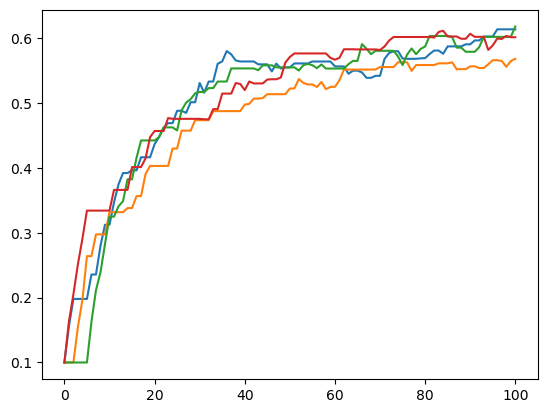

In [3]:
plt.plot(agentEWA1.Q_vals)
plt.plot(agentEWA2.Q_vals)
# plt.plot(agentEWA3.Q_vals)

(array([ 6.,  3., 16., 11., 16., 19., 12., 10.,  6.,  1.]),
 array([0.40075319, 0.44302628, 0.48529936, 0.52757244, 0.56984553,
        0.61211861, 0.65439169, 0.69666478, 0.73893786, 0.78121094,
        0.82348403]),
 <BarContainer object of 10 artists>)

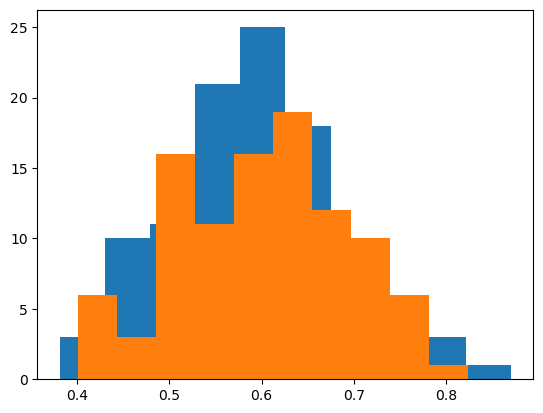

In [11]:
plt.hist(agentEWA1.payoffs)
plt.hist(agentEWA2.payoffs)
# plt.hist(agentEWA3.payoffs)

In [7]:
np.mean(agentEWA3.correct)

0.52

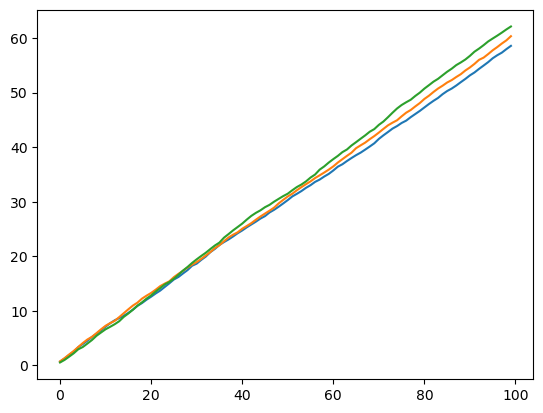

In [9]:
plt.plot(np.cumsum(agentEWA1.payoffs))
plt.plot(np.cumsum(agentEWA2.payoffs))
plt.plot(np.cumsum(agentEWA3.payoffs))